In [3]:
import pandas as pd
import quandl,datetime
import math
import numpy as np
from sklearn import preprocessing, svm #scale, regresions, cross shuffle stats sepeareate data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [5]:
style.use('ggplot')

In [6]:
data= pd.read_csv('BTC-USD.csv',parse_dates = True, index_col=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-26,424.628998,432.152008,421.619995,432.152008,432.152008,61486000.0
2016-02-27,432.838989,434.230988,428.102997,432.519012,432.519012,41893600.0
2016-02-28,432.571014,435.683014,423.820007,433.503998,433.503998,53033400.0
2016-02-29,433.437988,441.506989,431.692993,437.696991,437.696991,60694700.0
2016-03-01,437.916992,439.653015,432.319000,435.122986,435.122986,74895800.0


In [7]:
# Display features in data set
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
# Create a new DataFrame with only closing price and date
df = pd.DataFrame(data)

# Reset index column so that we have integers to represent time for later analysis
df = df.reset_index()

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-26,424.628998,432.152008,421.619995,432.152008,432.152008,61486000.0
1,2016-02-27,432.838989,434.230988,428.102997,432.519012,432.519012,41893600.0
2,2016-02-28,432.571014,435.683014,423.820007,433.503998,433.503998,53033400.0
3,2016-02-29,433.437988,441.506989,431.692993,437.696991,437.696991,60694700.0
4,2016-03-01,437.916992,439.653015,432.319000,435.122986,435.122986,74895800.0


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1828 non-null   datetime64[ns]
 1   Open       1824 non-null   float64       
 2   High       1824 non-null   float64       
 3   Low        1824 non-null   float64       
 4   Close      1824 non-null   float64       
 5   Adj Close  1824 non-null   float64       
 6   Volume     1824 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 100.1 KB


In [13]:
# Check for missing values in the columns
df.isna().values.any()

True

In [14]:
df=df.dropna()

In [15]:
df.isna().values.any()

False

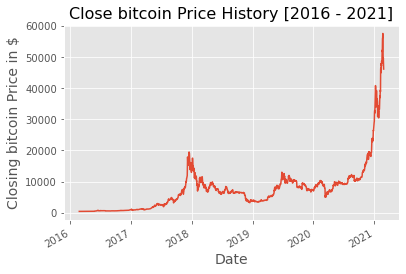

In [16]:
# Import matplotlib package for date plots
import matplotlib.dates as mdates

years = mdates.YearLocator() # Get every year
yearsFmt = mdates.DateFormatter('%Y') # Set year format

# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
ax.plot(df['Date'], df['Close'])

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

# Set figure title
plt.title('Close bitcoin Price History [2016 - 2021]', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Closing bitcoin Price in $', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [17]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [18]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)


In [19]:
# Import package for linear model
from sklearn.linear_model import LinearRegression

In [20]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [21]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# The coefficient
print('Slope: ', np.asscalar(np.squeeze(model.coef_)))
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  9.840054676393056
Intercept:  -1576.9032158800355


<ipython-input-22-f46d15fbfb1c>:2: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  print('Slope: ', np.asscalar(np.squeeze(model.coef_)))


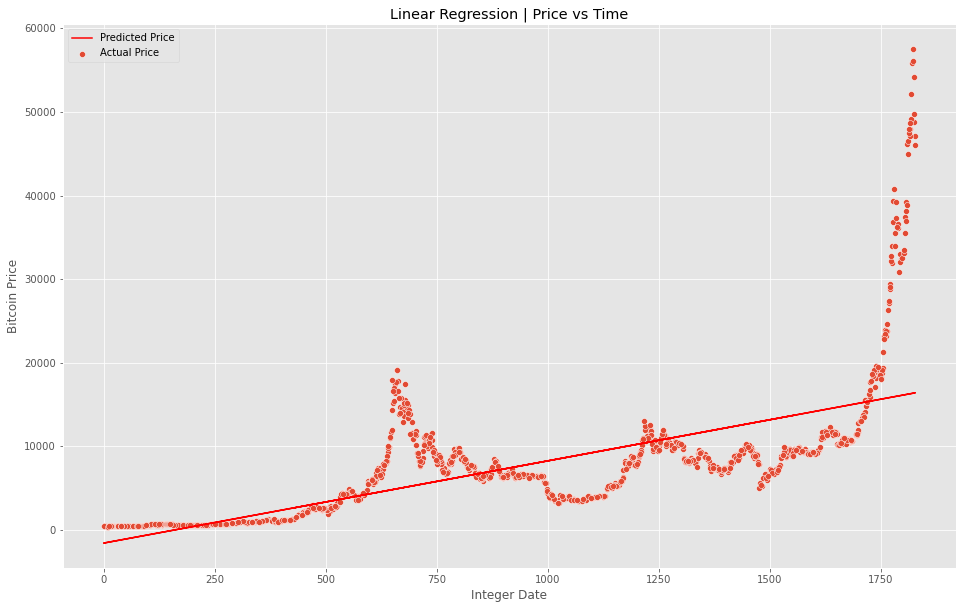

In [23]:

# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()


In [24]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [25]:
# Generate array with predicted values
y_pred = model.predict(X_test)

In [26]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

<ipython-input-26-34926f5cd57d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))


In [27]:
# Get number of rows in data set for random sample
df.shape

(1824, 8)

In [28]:
randints = np.random.randint(2550, size=25)

# Select row numbers == random numbers
df_sample = df[df.index.isin(randints)]

In [29]:
df_sample.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
201,2016-09-14,608.841003,611.952026,608.409973,610.684021,610.684021,47877700.0,400.947774
265,2016-11-17,744.875977,755.645020,739.510986,740.976990,740.976990,108579000.0,1030.711273
281,2016-12-03,778.247986,778.247986,764.856018,771.155029,771.155029,69547296.0,1188.152148
300,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008.0,1375.113187
324,2017-01-15,818.142029,823.307007,812.870972,821.797974,821.797974,71013600.0,1611.274499


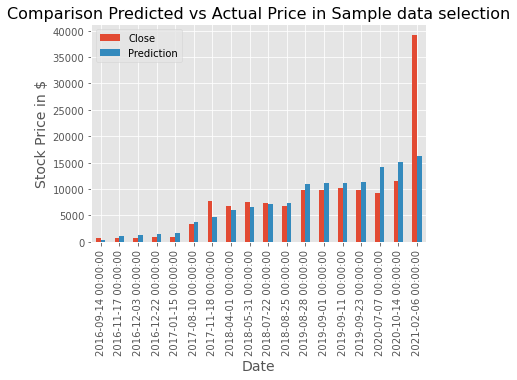

In [30]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

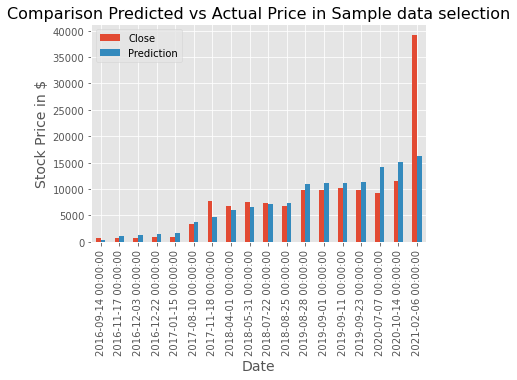

In [31]:
# Create subplots to plot graph and control axes
fig, ax = plt.subplots()
df_sample.plot(x='Date', y=['Close', 'Prediction'], kind='bar', ax=ax)

# Set figure title
plt.title('Comparison Predicted vs Actual Price in Sample data selection', fontsize=16)

# 

# Set x label
plt.xlabel('Date', fontsize=14)

# Set y label
plt.ylabel('Stock Price in $', fontsize=14)

# Show plot
plt.show()

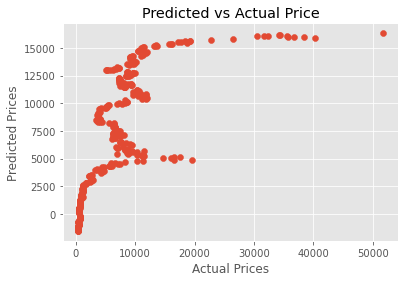

In [32]:
# Plot predicted vs actual prices
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.title('Predicted vs Actual Price')

plt.show()

In [33]:
import seaborn as sns

C:\Users\ALok\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


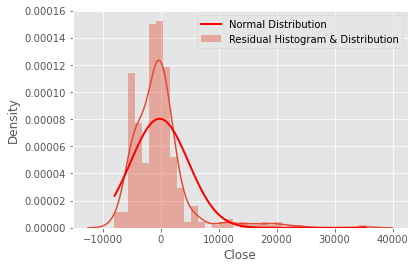

In [34]:
# Import norm package to plot normal distribution
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

# Calculate the pdf over a range of values         
x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)

# And plot on the same axes that seaborn put the histogram
ax.plot(x, p, 'r', lw=2, label='Normal Distribution') 

plt.legend()
plt.show()

In [35]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [36]:
# Statistical summary of test data
df['Close'].describe()

count     1824.000000
mean      7356.940374
std       7587.826225
min        400.570007
25%       2174.952454
50%       6610.478272
75%       9453.291259
max      57539.945313
Name: Close, dtype: float64

In [37]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3061.4064580055606
Mean Squared Error: 24684067.77719739
Root Mean Squared Error: 4968.306328840583


In [38]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.496236398654863

In [39]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.4954495694737915
